# CS5814: Assignment 4

## Problem 1

A simple value and policy iteration algorithm is implemented to solve OpenAIs fozen lake environment.

A custom environment layout is used and described within the code.

Information on the environment is available here: https://gym.openai.com/envs/FrozenLake8x8-v0/

## Imports

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.toy_text.frozen_lake import FrozenLakeEnv
from tqdm import tqdm


## Value Iteration

In [ ]:

def value_iteration(P, state_count, gamma, tol):
    """
    Performing value iteration

    See Sutton and Barto page 82 for more details
    """

    V, pi = np.zeros(state_count), np.zeros(state_count, dtype=int)

    # Value iteration
    steps = 0
    while True:

        steps += 1
        delta = 0

        # Iterating over all states
        for state in P:
            actions = P[state]
            v_prior = V[state]
            action_values = []

            # Iterating over all actions
            for action in actions:
                action_rewards = 0

                # Iterating over all potential results (as stocastic environment)
                for result in actions[action]:

                    # Gets probability (prob) of action resulting in s_next state, along with reward and done flag 
                    prob, s_next, r, done = result
                    
                    # Updating value for specific action
                    action_rewards += prob * (r + gamma * V[s_next])
                action_values.append(action_rewards)

            # Update value
            v_new = max(action_values)
            V[state] = v_new
            
            # Convergence criteria (change in values)
            delta = max(delta, abs(v_prior - v_new))

        if delta < tol:
            break

    # Extracting policy from converged value function
    # Iterating over all states
    for state in range(state_count):
        actions = P[state]
        action_values = []

        # Iterating over all actions
        for action in actions:
            action_rewards = 0

            # Iterating over all potential results (as stocastic environment)
            # and caclulate discounted future rewards
            for result in actions[action]:
                prob, s_next, r, done = result
                action_rewards += prob * (r + gamma * V[s_next])
            action_values.append(action_rewards)

        # Get value maximizing action for optimal policy
        action_max = np.argmax(action_values)
        pi[state] = action_max

    return V, pi, steps

## Policy Iteration

In [ ]:
def policy_iteration(P, state_count, gamma, tol):
    """
    Performing policy iteration

    See Sutton and Barto page 80 for more details
    """

    def policy_evaluation():
        # Policy evaluation sub function


        while True:
            delta = 0  # Change in value (used as convergence criteria)

            # Iterating over all states
            for state in range(state_count):

                V_prior = V[state]
                V_new = 0

                # Iterating over all actions
                for action in range(action_count):

                    p_a = pi[state][action]  # probability that action is taken based on policy

                    # Iterating over all possible results (as stocastic env)
                    for result in P[state][action]:

                        # Gets probability (prob) of action resulting in s_next state, along with reward and done flag 
                        prob, s_next, r, done = result 
                        V_new += p_a * prob * (r + gamma * V[s_next])

                V[state] = V_new
                delta = max(delta, abs(V_prior - V_new)) # Tracking convergence stats

            # Convergence criteria
            if delta < tol:
                return V, pi



    def policy_update():
        # Policy update sub function

        policy_stable = True

        # Iterating over all states
        for state in range(state_count):

            actions = P[state]
            action_values = []
            old_action = pi[state]

            # Iterating over all actions
            for action in actions:

                action_rewards = 0
                 
                # Iterating over all possible results (as stocastic env)
                for result in actions[action]:
                    prob, s_next, r, done = result

                    # Calulating future discounted rewards
                    action_rewards += prob * (r + gamma * V[s_next])
                action_values.append(action_rewards)

            # Find reward maximizing action and using that for new policy
            new_action = one_hot(np.argmax(action_values), 4)
            
            # Convergence check to see if policy actions have not changed
            if np.array_equal(old_action, new_action) == False:
                policy_stable = False
            pi[state] = new_action

        return policy_stable


    # Initalizing value and policy arrays
    V, pi_star = np.zeros(state_count), np.zeros(state_count, dtype=int)
    pi_random = np.array([[0.25, 0.25, 0.25, 0.25]] * 25)
    action_count = 4
    pi = pi_random
    steps = 0

    # Main policy iteration loop
    while True:

        # Move between policy evaluation and update until stable
        steps += 1
        V, pi = policy_evaluation()
        policy_stable = policy_update()

        # Extract optimal policy for pretty printing
        if policy_stable:
            for state in range(state_count):
                pi_star[state] = np.argmax(pi[state])
            return V, pi_star, steps

## Helper functions

In [ ]:
def one_hot(id, length):
    # One hot vector encoding helper function 
    
    one_hot_vector = []
    for i in range(length):
        one_hot_vector.append(1) if i == id else one_hot_vector.append(0)
    return np.array(one_hot_vector)

In [ ]:
def running_mean(x, N):
    # Helper function for calculating running mean
    
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [ ]:
def pretty_print(V, pi, steps, name):
    # Displaying results training

    print("{} iteration converged in {} steps\n".format(name, steps))

    print('Value Table:')
    print(V.reshape(5, 5))
    print("\n")

    heatmap2d(V)

    print("\nLearnt policy:")
    policy_dir = np.array([symbol_dict[action] for action in pi]).reshape(5,5)
    print(policy_dir)
    policymap2d(policy_dir, V)

In [ ]:
def heatmap2d(arr):
    #Heatmap generation code

    arr = arr.reshape(5, 5)

    plt.figure(figsize=(8,6))
    plt.imshow(arr, cmap='coolwarm')
    plt.colorbar()
    for (j, i), label in np.ndenumerate(arr):
        label = "{:.5f}".format(label)
        plt.text(i, j, label, ha='center', va='center')

    plt.axis('off')
    plt.show()

In [ ]:
def policymap2d(arr, c_arr):
    #Heatmap generation code

    arr = arr.reshape(5, 5)
    c_arr = c_arr.reshape(5, 5)

    plt.figure(figsize=(8,6))
    plt.imshow(c_arr, cmap='coolwarm')
    plt.colorbar()
    for (j, i), label in np.ndenumerate(arr):
        plt.text(i, j, label, ha='center', va='center', fontsize= 'xx-large')

    plt.axis('off')
    plt.show()

## Main training loop

In [ ]:
def simulation(env, policy, episodes, name):
    # Running a simulation on a trained policy to get statistics (sucess rates)

    print("\nStarting simulation of learnt policy from {} iteration".format(name))
    reward_cum_array = []

    for episode in tqdm(range(episodes)):
        reward_cum = 0
        state = env.reset()

        # Running for maximum of 100 steps
        for _ in range(100):
            action = policy[state]
            new_state, reward, done, info = env.step(action)
            reward_cum += reward
            state = new_state

            if done:
                # Final state reached
                break

        # Tracking rewards
        reward_cum_array.append(reward_cum)


    
    return reward_cum_array

In [ ]:
def VI_PI(is_slippery=False, gamma=0.9):
    # Runs both value and policy iteration, along with a simulation based on the final policy iteration policy

    # Provided map configuration (S = start, F = free, H = hole, G = goal)
    map_layout = ['SFHFF', 'FHFFF', 'FFFHF', 'FFFFH', 'HFFFG']

    env = FrozenLakeEnv(desc=map_layout, is_slippery=is_slippery)

    env.reset()
    state_count = env.observation_space.n


    # Running training

    # Value Iteration
    V_V, pi_V, steps_V = value_iteration(P=env.P, state_count=state_count,
                                         gamma=gamma, tol=1e-3)
    
    # Policy Iteration
    V_P, pi_P, steps_P = policy_iteration(P=env.P, state_count=state_count,
                                          gamma=gamma, tol=1e-3)


    # Displaying results 
    
    # Value iteration
    pretty_print(V_V, pi_V, steps_V, "Value")
    reward_ts = simulation(env, pi_V, 1000, name="Value")
    print("Completion rate: {:.2f}%".format(100*np.average(reward_ts)))
    print("----------------------------------------------------\n")
    # Polciy iteration
    pretty_print(V_P, pi_P, steps_P, "Policy")
    reward_ts = simulation(env, pi_P, 1000, name="Policy")
    print("\nCompletion rate: {:.2f}%".format(100*np.average(reward_ts)))
    print("----------------------------------------------------\n")


In [ ]:
symbol_dict = {3: "↑", 1: "↓", 0: "←", 2: "→"}  # Used to generate readable policy

## Value and Policy Iteration with is_slippery = False

Value iteration converged in 9 steps

Value Table:
[[0.4782969  0.43046721 0.         0.531441   0.4782969 ]
 [0.531441   0.         0.6561     0.59049    0.531441  ]
 [0.59049    0.6561     0.729      0.         0.4782969 ]
 [0.6561     0.729      0.81       0.9        0.        ]
 [0.         0.81       0.9        1.         0.        ]]




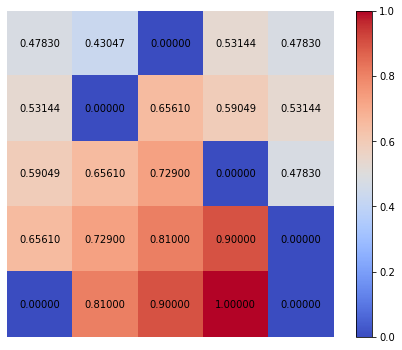


Learnt policy:
[['↓' '←' '←' '↓' '←']
 ['↓' '←' '↓' '←' '←']
 ['↓' '↓' '↓' '←' '↑']
 ['→' '↓' '↓' '↓' '←']
 ['←' '→' '→' '→' '←']]


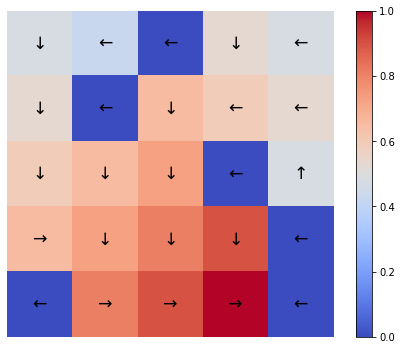


Starting simulation of learnt policy from Value iteration


100%|██████████| 1000/1000 [00:00<00:00, 6559.73it/s]

Completion rate: 100.00%
----------------------------------------------------

Policy iteration converged in 3 steps

Value Table:
[[0.4782969  0.43046721 0.         0.531441   0.4782969 ]
 [0.531441   0.         0.6561     0.59049    0.531441  ]
 [0.59049    0.6561     0.729      0.         0.4782969 ]
 [0.6561     0.729      0.81       0.9        0.        ]
 [0.         0.81       0.9        1.         0.        ]]




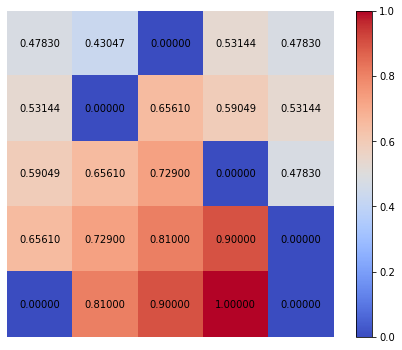


Learnt policy:
[['↓' '←' '←' '↓' '←']
 ['↓' '←' '↓' '←' '←']
 ['↓' '↓' '↓' '←' '↑']
 ['→' '↓' '↓' '↓' '←']
 ['←' '→' '→' '→' '←']]


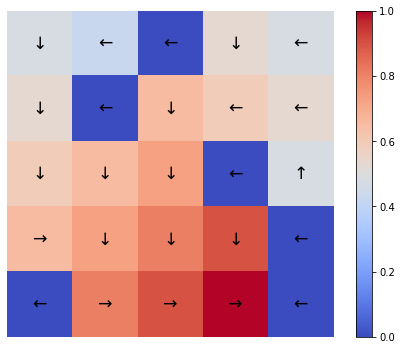


Starting simulation of learnt policy from Policy iteration


100%|██████████| 1000/1000 [00:00<00:00, 3958.82it/s]


Completion rate: 100.00%
----------------------------------------------------



In [ ]:
VI_PI(is_slippery=False)

## Value and Policy Iteration with is_slippery = False, Gamma = 0.6

Value iteration converged in 9 steps

Value Table:
[[0.0279936  0.01679616 0.         0.046656   0.0279936 ]
 [0.046656   0.         0.1296     0.07776    0.046656  ]
 [0.07776    0.1296     0.216      0.         0.0279936 ]
 [0.1296     0.216      0.36       0.6        0.        ]
 [0.         0.36       0.6        1.         0.        ]]




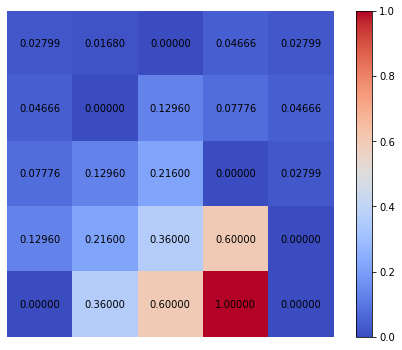


Learnt policy:
[['↓' '←' '←' '↓' '←']
 ['↓' '←' '↓' '←' '←']
 ['↓' '↓' '↓' '←' '↑']
 ['→' '↓' '↓' '↓' '←']
 ['←' '→' '→' '→' '←']]


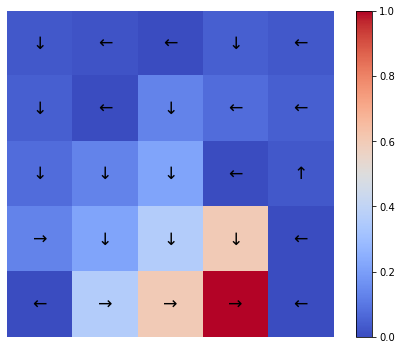


Starting simulation of learnt policy from Value iteration


100%|██████████| 1000/1000 [00:00<00:00, 5334.72it/s]

Completion rate: 100.00%
----------------------------------------------------

Policy iteration converged in 3 steps

Value Table:
[[0.0279936  0.01679616 0.         0.046656   0.0279936 ]
 [0.046656   0.         0.1296     0.07776    0.046656  ]
 [0.07776    0.1296     0.216      0.         0.0279936 ]
 [0.1296     0.216      0.36       0.6        0.        ]
 [0.         0.36       0.6        1.         0.        ]]




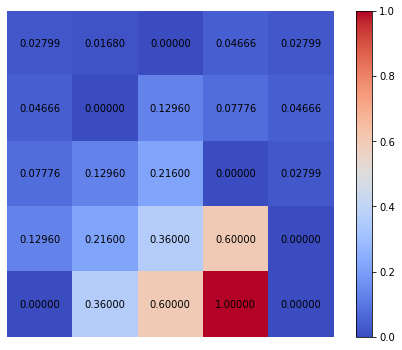


Learnt policy:
[['↓' '←' '←' '↓' '←']
 ['↓' '←' '↓' '←' '←']
 ['↓' '↓' '↓' '←' '↑']
 ['→' '↓' '↓' '↓' '←']
 ['←' '→' '→' '→' '←']]


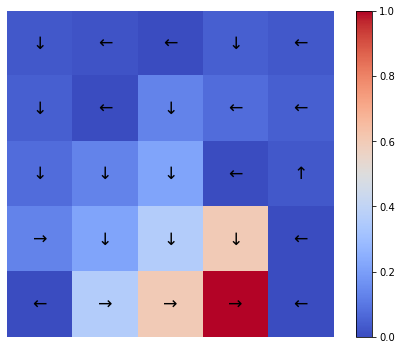


Starting simulation of learnt policy from Policy iteration


100%|██████████| 1000/1000 [00:00<00:00, 5631.00it/s]


Completion rate: 100.00%
----------------------------------------------------



In [ ]:
VI_PI(is_slippery=False, gamma=0.6)

## Value and Policy Iteration with is_slippery = True

Value iteration converged in 25 steps

Value Table:
[[0.0479897  0.02039927 0.         0.01468844 0.01253308]
 [0.0661871  0.         0.04436266 0.02212186 0.01480302]
 [0.10724824 0.12553847 0.12596244 0.         0.00632087]
 [0.12531349 0.18546612 0.25004309 0.26687287 0.        ]
 [0.         0.24280329 0.38122385 0.63956043 0.        ]]




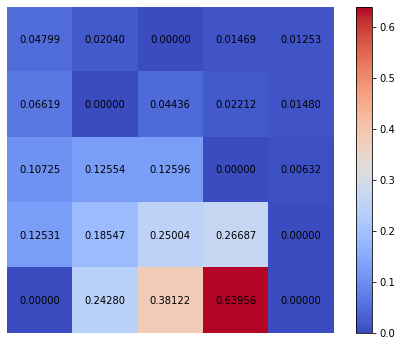


Learnt policy:
[['←' '←' '←' '→' '↓']
 ['←' '←' '↓' '↑' '↑']
 ['↓' '↓' '←' '←' '→']
 ['↑' '→' '↓' '←' '←']
 ['←' '→' '→' '↓' '←']]


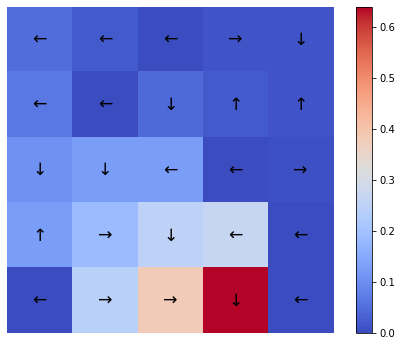


Starting simulation of learnt policy from Value iteration


100%|██████████| 1000/1000 [00:00<00:00, 1324.18it/s]


Completion rate: 53.90%
----------------------------------------------------

Policy iteration converged in 3 steps

Value Table:
[[0.04821155 0.02050802 0.         0.01473008 0.01257297]
 [0.06631369 0.         0.04437886 0.02215171 0.01483643]
 [0.10727423 0.12555589 0.12597518 0.         0.00633687]
 [0.12533436 0.18547763 0.25004972 0.26687585 0.        ]
 [0.         0.24281236 0.38122881 0.63956291 0.        ]]




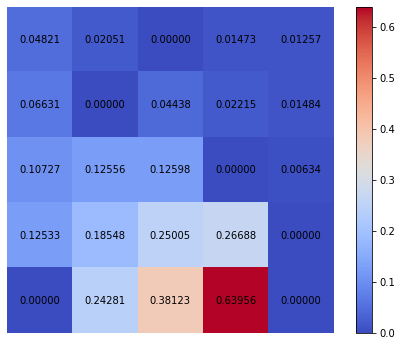


Learnt policy:
[['←' '←' '←' '→' '←']
 ['←' '←' '↓' '↑' '↑']
 ['↓' '↓' '←' '←' '→']
 ['↑' '→' '↓' '←' '←']
 ['←' '→' '→' '↓' '←']]


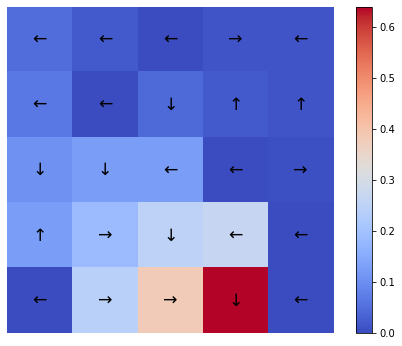


Starting simulation of learnt policy from Policy iteration


100%|██████████| 1000/1000 [00:00<00:00, 1195.48it/s]


Completion rate: 57.30%
----------------------------------------------------



In [ ]:
VI_PI(is_slippery=True)